In [1]:
#stuff
import datetime
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

# for data handling
import pandas as pd
import numpy as np

# train-test split
from sklearn.model_selection import train_test_split

# loss functions for today
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# stuff for evaluating classifiers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # for displaying a pretty confusion matrix

# dummy models for comparison
from sklearn.dummy import DummyClassifier

# classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [3]:
import tabulate

In [4]:
bankdf=pd.read_csv("bank-additional-full.csv", sep=';')

In [5]:
bankdf.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# CREATION OF YEAR VARIABLE

nemployed = bankdf['nr.employed']

unique, index = np.unique(nemployed, return_index=True) # [5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5, 5008.7, 4991.6, 4963.6]

# 2008: 5191. , 5228.1, 5195.8
# 2009: 5176.3, 5099.1, 5076.2, 5017.5
# 2010: 5023.5, 5008.7, 4991.6, 4963.6

year_df = {'year':['2008','2008','2008','2009','2009','2009','2009','2010','2010','2010','2010'], 
           'nr.employed':[5191. , 5228.1, 5195.8, 5176.3, 5099.1, 5076.2, 5017.5, 5023.5, 5008.7, 4991.6, 4963.6]}
year_df = pd.DataFrame.from_dict(year_df)

bankdf = bankdf.merge(year_df, on='nr.employed', how='left')

In [7]:
# Creating a function to convert the month abbrevuation in number

bankdf["month_name"] = bankdf["month"]

def convert_month(df):
    df['month'] = [int(datetime.datetime.strptime(obv, '%b').month) for obv in df['month_name']]
    df['year'] = [int(obv) for obv in df['year']]
convert_month(bankdf)

## Preprocessing

In [8]:
bankdf["day"] = int(1)
bankdf['date']=pd.to_datetime(bankdf[['year','month','day']])

In [9]:
# Unknown count

#bankdf.nunique()
#bankdf.isnull().sum() # no NAs but there are some classes "Unknown", what should we do with them?

for column in bankdf.select_dtypes(include=object):
     print("\n" + column)
     print(bankdf[column].value_counts().to_markdown())
    
# job: 330 
# marital: 80
# education: 1731
# default: 8597
# housing 990
# loan: 990


job
|               |   job |
|:--------------|------:|
| admin.        | 10422 |
| blue-collar   |  9254 |
| technician    |  6743 |
| services      |  3969 |
| management    |  2924 |
| retired       |  1720 |
| entrepreneur  |  1456 |
| self-employed |  1421 |
| housemaid     |  1060 |
| unemployed    |  1014 |
| student       |   875 |
| unknown       |   330 |

marital
|          |   marital |
|:---------|----------:|
| married  |     24928 |
| single   |     11568 |
| divorced |      4612 |
| unknown  |        80 |

education
|                     |   education |
|:--------------------|------------:|
| university.degree   |       12168 |
| high.school         |        9515 |
| basic.9y            |        6045 |
| professional.course |        5243 |
| basic.4y            |        4176 |
| basic.6y            |        2292 |
| unknown             |        1731 |
| illiterate          |          18 |

default
|         |   default |
|:--------|----------:|
| no      |     32588 |


In [10]:
bankdf = bankdf.drop_duplicates()
len(bankdf)

41176

In [11]:
bankdf.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
year              0
month_name        0
day               0
date              0
dtype: int64

In [12]:
#New Dataframe without unknown values
bankdfn = bankdf[(bankdf['default'] != "unknown") & (bankdf['job'] != "unknown") & (bankdf['marital'] != "unknown") & (bankdf['education'] != "unknown") & (bankdf['housing'] != "unknown") & (bankdf['loan'] != "unknown")]

In [13]:
len(bankdfn)

30478

In [14]:
# If y is yes, then 1 otherwise 0
bankdf['y'] = np.where(bankdf['y']=='yes', 1, 0)

In [15]:
# If y is yes, then 1 otherwise 0
bankdfn['y'] = np.where(bankdfn['y']=='yes', 1, 0)

C:\Users\MyName\AppData\Local\Temp/ipykernel_7484/3668183423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bankdfn['y'] = np.where(bankdfn['y']=='yes', 1, 0)


In [18]:
# Create Dummy Variables

bank_dummies = pd.get_dummies(bankdfn.drop(['month_name', 'date', 'day', 'year'], axis=1), drop_first = True)
bank_dummies.columns 

# dropping year because correlation is too high with the and social features (was created starting from those)


Index(['age', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_married', 'marital_single', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

## Classification 

In [39]:
# Standardize X? Why?

In [19]:
# Dataset split into test, validation and training set: 20% or 30 test set? Need validation if use CV?

X = bank_dummies.drop('y', axis=1)
y = bank_dummies["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) # train and test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=42) # train and validation

print("Xtrain", X_train.shape, "y_train", 
      y_train.shape, "X_test","X_val", X_val.shape, "y_val", 
      y_val.shape, "X_test", X_test.shape, "y_test", y_test.shape) 

Xtrain (17143, 39) y_train (17143,) X_test X_val (5715, 39) y_val (5715,) X_test (7620, 39) y_test (7620,)


In [22]:
# L2
logr = LogisticRegression(max_iter=100000).fit(X_train,y_train)

In [28]:
print("Accuracy on training set: {:.3f}".format(logr.score(X_train,y_train))) #  0.9108606557377049
print("Accuracy on validation set: {:.3f}".format(logr.score(X_val,y_val))) # 0.9131754705525197
print("Accuracy on test set: {:.3f}".format(logr.score(X_test, y_test)))

Accuracy on training set: 0.899
Accuracy on validation set: 0.906
Accuracy on test set: 0.901


In [29]:
#print coefficient
coefficient = logr.coef_
coefficient

array([[ 3.25568231e-03, -4.13133282e-02,  4.39482505e-03,
        -4.65775796e-02, -2.02074360e-03, -3.32162498e-01,
        -3.38825181e-01,  4.46326864e-01,  4.07519288e-02,
        -8.23091041e-02, -8.08898301e-03, -3.32948307e-01,
        -8.92684624e-02,  1.99316687e-02, -6.70720790e-02,
         1.74200675e-01,  2.49773777e-02, -1.10031094e-01,
         1.65787768e-01,  8.29306871e-03,  4.65545852e-02,
         4.44467647e-03,  9.13673921e-02, -3.80615725e-02,
        -1.03684832e-01, -1.85507016e-02,  1.35953268e-02,
         4.18582583e-02,  2.02571910e-01, -1.96598309e-04,
         2.26525126e-02, -7.30999826e-02, -5.46558181e-01,
        -1.90479778e-01,  6.62481401e-02,  5.24374612e-02,
         1.04172034e-01,  3.53591803e-01,  7.77131676e-02]])

In [37]:
# Alida copy: Interpretation of C in Logistic Regression

# Tuning alpha/lambda for Ridge

# CAN DO THE SAME WITH LASSO PENALTY

# define grid
alpha_grid = {
    'C':  np.arange(0.1, 1.1, 0.1)
}

# Set up GridSearchCV 
grid_search = GridSearchCV(logr, alpha_grid, cv=10, n_jobs=-1)
alpha_grid

{'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}

In [ ]:
## DOESNT FINISH

# Fit the grid search 
grid_search.fit(X_train, y_train)

# Retrieve and print the scores for each iteration
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"Accuracy score for {params}: {mean_score}")

# Retrieve the best hyperparameters and the corresponding best estimator
best_alpha = grid_search.best_params_['C']
best_ridge_model = grid_search.best_estimator_

# Print the best hyperparameters
print(f"Best Alpha for regularization: {best_alpha}")

In [ ]:
# Evaluate the best model on the test data
print(f"Validation Accuracy with best model: {best_model.score(X_val, y_val)}")

In [ ]:
coefficient = best_model.coef_
coefficient

In [34]:
# L1
logr2 = LogisticRegression(penalty = "l1", solver = "saga", max_iter=100000).fit(X_train,y_train)

In [35]:
print("Accuracy on training set: {:.3f}".format(logr2.score(X_train,y_train))) #  0.9108606557377049
print("Accuracy on validation set: {:.3f}".format(logr2.score(X_val,y_val))) # 0.9131754705525197
print("Accuracy on test set: {:.3f}".format(logr2.score(X_test, y_test)))

Accuracy on training set: 0.895
Accuracy on validation set: 0.903
Accuracy on test set: 0.895


In [ ]:
# copy Alida
grid_search = GridSearchCV(logr2, alpha_grid, cv=10, n_jobs=-1)

grid_search.fit(X_train, y_train)

# Retrieve and print the scores for each iteration
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(f"Accuracy score for {params}: {mean_score}")

# Retrieve the best hyperparameters and the corresponding best estimator
best_alpha = grid_search.best_params_['C']
best_lasso_model = grid_search.best_estimator_

# Print the best hyperparameters
print(f"Best Alpha for regularization: {best_alpha}")

In [ ]:
# Evaluate the best model on the test data
print(f"Validation Accuracy with best model: {best_model.score(X_val, y_val)}")

In [ ]:
coefficient = best_model.coef_
coefficient 

# with 0.7 just 1 to 0 - BEST
# with 0.2 a lot to 0

# What's the column to 0?  'education_basic.9y'.... doesn't make sense, would be better to perform a group lasso

In [ ]:
# Try with Cross Validation 5 folds

# ATTENTION!!!!! VALIDATION SET HERE DOES NOT MAKE SENSE!!!!

cv5_scores = cross_val_score(model_logit, X_train_standardized, y_train, cv=5)
cv5_scores

In [ ]:
print("The average test score is:", cv5_scores.mean())
print("The standard deviation of the test scores is:", cv5_scores.std()) #good!

## KNN

In [41]:
kn = KNeighborsClassifier().fit(X_train,y_train)

In [42]:
kn_y_pred = kn.predict(X_test)

In [44]:
print("Score on training set: {:.3f}".format(kn.score(X_train, y_train)))
print("Score on validation set: {:.3f}".format(kn.score(X_val, y_val)))
print("Score on test set: {:.3f}".format(kn.score(X_test, y_test)))

Score on training set: 0.921
Score on validation set: 0.897
Score on test set: 0.892


In [46]:
# The rule of thumb is sqrt(n)
import math 

k = math.ceil(math.sqrt(X_train.shape[0])) # odd number
#163

kn = KNeighborsClassifier(n_neighbors=k)  
kn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=131)

In [47]:
print("Score on training set: {:.3f}".format(kn.score(X_train, y_train)))
print("Score on validation set: {:.3f}".format(kn.score(X_val, y_val)))
print("Score on test set: {:.3f}".format(kn.score(X_test, y_test)))

Score on training set: 0.900
Score on validation set: 0.902
Score on test set: 0.903


## Decision Tree

In [49]:
from sklearn import tree

In [52]:
# doesnt compute 
dtree = tree.DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
print("Score on training set: {:.3f}".format(dtree.score(X_train, y_test)))
print("Score on validation set: {:.3f}".format(dtree.score(X_val, y_val)))
print("Score on test set: {:.3f}".format(dtree.score(X_test, y_test)))

ValueError: Found input variables with inconsistent numbers of samples: [7620, 17143]

## Random Forest

In [56]:
# implement a random forest classifier here
rf = RandomForestClassifier(max_depth=10)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on validation set: {:.3f}".format(rf.score(X_val, y_val)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.937
Accuracy on validation set: 0.903
Accuracy on test set: 0.899


In [57]:
# print the random forest classification report here
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      6636
           1       0.70      0.39      0.50       984

    accuracy                           0.90      7620
   macro avg       0.81      0.68      0.72      7620
weighted avg       0.89      0.90      0.89      7620



## Confusion Matrix

In [59]:
dm = DummyClassifier()
dm.fit(X_train, y_train)
dm_y_pred = dm.predict(X_test)

print("Accuracy on training set: {:.3f}".format(dm.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dm.score(X_test, y_test)))

cm = confusion_matrix(y_test, dm_y_pred)
print(cm)

Accuracy on training set: 0.872
Accuracy on test set: 0.871
[[6636    0]
 [ 984    0]]


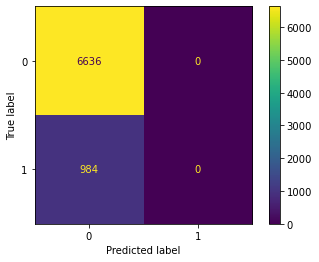

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=dm.classes_)
disp.plot()
plt.show()

## Fairness

In [66]:
from sklearn.metrics import classification_report, roc_curve, auc

In [61]:
# for fairness assessment
from fairlearn.metrics import MetricFrame, true_positive_rate, false_positive_rate, selection_rate, equalized_odds_difference, demographic_parity_difference, selection_rate

# for mitigation
from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer

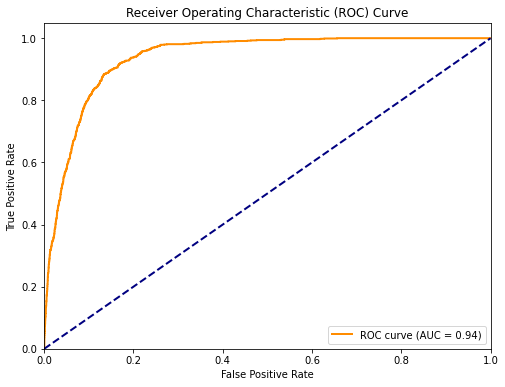

In [67]:
# Step 1: Compute the predicted probabilities for the positive class
y_prob = rf.predict_proba(X_test)[:,1]

# Step 2: Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Step 3: Compute the AUC
roc_auc = auc(fpr, tpr)

# Step 4: Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

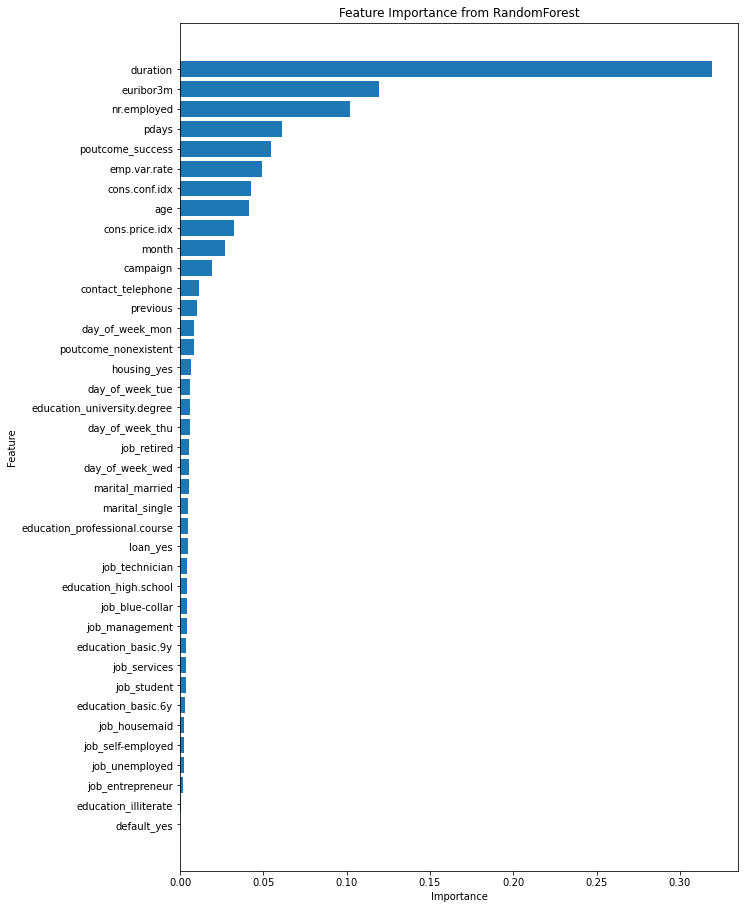

In [69]:
# extract feature importances
importances = rf.feature_importances_

# pair each feature with its importance
features = X_test.columns 
feature_importance = sorted(zip(importances, features), reverse=True)

# extracting sorted importance values and their corresponding labels for plotting
sorted_importances = [value[0] for value in feature_importance]
sorted_features = [value[1] for value in feature_importance]

# plot the features and their importance
plt.figure(figsize=(10, len(sorted_features) * 0.4)) # adjusting the figure height based on number of features
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from RandomForest')
plt.gca().invert_yaxis() # to display the feature with the highest importance at the top
plt.show()

In [72]:
# create a MetricFrame to compute metrics across groups
metrics = MetricFrame(metrics={
    'selection_rate': selection_rate,
    'TPR': true_positive_rate, 
    'FPR': false_positive_rate},
    y_true=y_test,y_pred=rf_y_pred,
    sensitive_features=X_test['age'])

# Print the results
print(metrics.by_group)

     selection_rate       TPR       FPR
age                                    
17         0.000000  0.000000  0.000000
18         0.400000  0.500000  0.333333
19         0.000000  0.000000  0.000000
20         0.357143  0.428571  0.285714
21         0.142857  0.400000  0.062500
..              ...       ...       ...
84         1.000000  1.000000  0.000000
85         0.000000  0.000000  0.000000
87         0.000000  0.000000  0.000000
88         0.285714  0.400000  0.000000
91         0.000000  0.000000  0.000000

[72 rows x 3 columns]


In [73]:
# Compute the demographic parity difference
dpd = demographic_parity_difference(y_test, rf_y_pred, sensitive_features=X_test["age"])
print(f"Demographic Parity Difference: {dpd:.2f}")

Demographic Parity Difference: 1.00


In [74]:
# Compute the equalized odds difference
eod = equalized_odds_difference(y_test, rf_y_pred, sensitive_features=X_test["age"])
print(f"Equalized Odds Difference: {eod:.2f}")

Equalized Odds Difference: 1.00


In [76]:
# Instantiate the equalized odds post-processor
postprocessor = ThresholdOptimizer(
    estimator=rf,
    constraints="equalized_odds",
    predict_method='auto',
    prefit=True
)

# Fit the post-processor
postprocessor.fit(X_test, y_test, sensitive_features=X_test['age'])

# Predict using the mitigated model
y_pred_mitigated = postprocessor.predict(X_test, sensitive_features=X_test['age'])

ValueError: Degenerate labels for sensitive feature value 17